## Top 50 word count split by author 

In [8]:
import base64
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
import string
import re
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
train_df = pd.read_csv(r"C:\Users\wangtao\Desktop\train_data.csv")
test_df = pd.read_csv(r"C:\Users\wangtao\Desktop\test_data.csv")

In [31]:
## Number of words in the text ##
import re 

# Split into words
train_df['split'] = train_df['text'].apply(nltk.word_tokenize)

# Apply stemming (Snowball). We also exclude stopwords in this step,
# as well as punctuation
stopwords = nltk.corpus.stopwords.words('english') + ['']
stemmer = EnglishStemmer()


# Save a mapping of all (unique) words to integers
unique_words = set([w for sentence in train_df['split'].values for w in sentence])

##dict_train_data = {s: i for i,s in enumerate(unique_words)} 
## enumerate()使用:如果对一个列表，既要遍历索引又要遍历元素时可以用 相当于是 [i,list[i]for i in range（len(list)）]
## 可以改为[index, item for index, item in enumerate(list)]

stemmers = [stemmer.stem(u) for u in unique_words]
#reverse_stemmer = {u:[] for u in stemmer_dict.values()}
#for k in stemmer_dict:
#    reverse_stemmer[stemmer_dict[k]].append(k)
train_df['stemmed'] = train_df['split'].apply(lambda x: [stemmer.stem(y) for y in x
                                               if re.sub('[^a-z]+','',y.lower()) not in stopwords])


In [32]:
## test data frame
train_df.head()

,chapter,author,text,split,stemmed
0,CH1,JJ,THERE was no hofor him this time: it was the t...,"[THERE, was, no, hofor, him, this, time, :, it...","[hofor, time, third, stroke]"
1,CH1,JJ,Night after night I had passed thehouse (it wa...,"[Night, after, night, I, had, passed, thehouse...","[night, night, pass, thehous, vacat, time, stu..."
2,CH1,JJ,If he was dead I thought I would see thereflec...,"[If, he, was, dead, I, thought, I, would, see,...","[dead, thought, would, see, thereflect, candl,..."
3,CH1,JJ,"He had often said to me: ""I am not long for th...","[He, had, often, said, to, me, :, ``, I, am, n...","[often, said, long, world, thought, word, idl]"
4,CH1,JJ,Now I knew they were true.,"[Now, I, knew, they, were, true, .]","[knew, true]"


In [51]:
# Count words overall and by author
word_count = {'ALL': pd.Series([y for x in train_df['stemmed'] for y in x]).value_counts()}
authors = ['JJ','RY','RC']
authors_dict = {auth: i for i, auth in enumerate(authors)}
for auth in authors:
    word_count[auth] = pd.Series([y for x in train_df.loc[train_df['author']==auth, 'stemmed']
                                  for y in x]).value_counts()
word_count = pd.DataFrame(word_count).fillna(0).astype(int).sort_values('ALL', ascending=False)[['ALL']+authors]

print(word_count[authors[:3]])

print('Count for the most common words (excl. stopwords)')

#word_count.head(10).style.background_gradient(subset=authors,
#                                              cmap=LinearSegmentedColormap.from_list('', ['ivory','yellow']))

                 JJ   RY   RC
said            566  334  423
n't             160  356  187
one             148  173   89
go               95  122  153
look             80  158  123
would           145  162   32
like             98  156   74
say              85   83  144
know             77  126  102
could            85  153   61
man             159   64   59
time             78  154   47
back             57  106  112
littl            93  124   43
thing            31  128   81
get              44  107   79
hand             77   99   54
right            51  117   56
see              68   88   57
well             84  105   23
think            58   97   55
come             72   73   63
old             115   52   41
got              30  106   71
good             69   85   35
us               64   85   36
ask             119   41   19
went             62   50   64
turn             56   70   50
way              38  112   26
...             ...  ...  ...
incomplexion      1    0    0
incompet  

(-0.7, 49.7)

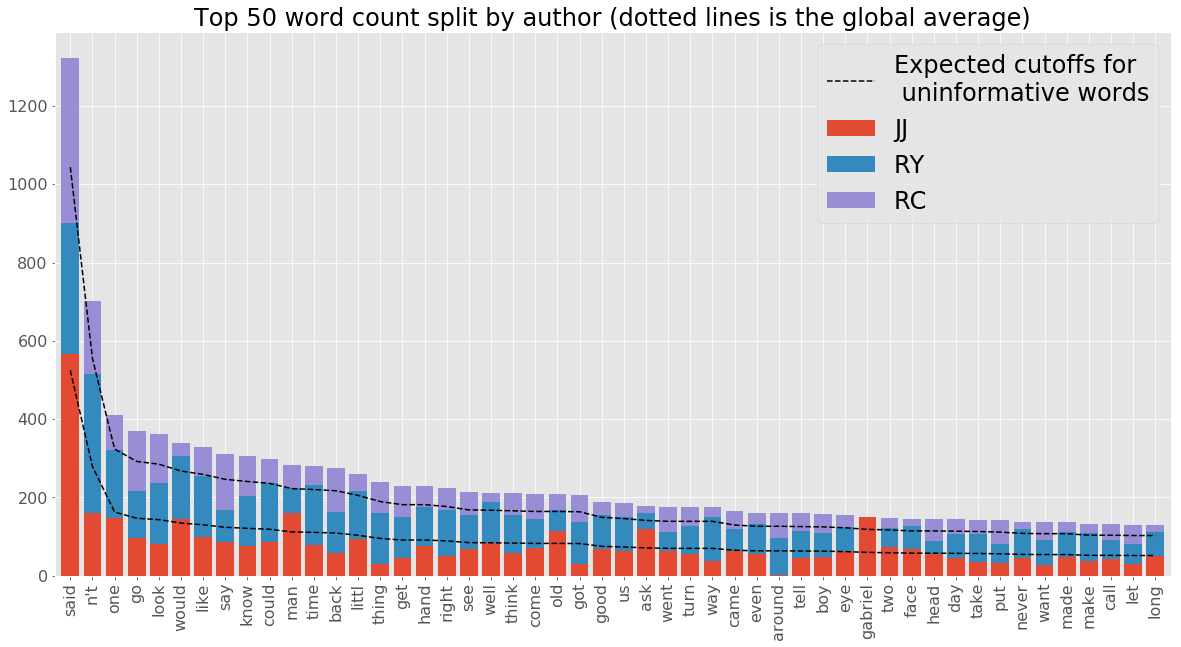

In [39]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 16
plt.figure(figsize=(20,10))
bottom = np.zeros((50))
ind = np.arange(50)
df = word_count.head(50)
for auth in authors:
    # Stacked bar with actual numbers.
    # Uncomment the below for percentages instead.
    vals = df[auth]# / df['ALL']
    plt.bar(ind, vals, bottom=bottom, label = auth)
    bottom += vals

# If using percentages, replace the two "df['ALL']" by "np.ones(df['ALL'].shape)"
plt.plot(ind, df['ALL'] * word_count[authors[0]].sum() / word_count['ALL'].sum(), 'k--',
         label='Expected cutoffs for\n uninformative words')
plt.plot(ind, df['ALL'] * word_count[authors[:2]].values.sum() / word_count['ALL'].sum(), 'k--', label='')
plt.xticks(ind, df.index, rotation='vertical')
#plt.yticks(np.arange(0,1.1,0.2), ['{:.0%}'.format(x) for x in np.arange(0,1.1,0.2)])
plt.legend(fontsize=24)
plt.title('Top 50 word count split by author (dotted lines is the global average)', fontsize=24)
plt.xlim([-0.7,49.7])## 设置坐标轴取值范围